<a href="https://colab.research.google.com/github/whispermy/novatus_academia/blob/main/Week3_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI 노바투스과정**

Week 3: 딥러닝 기초 I (2021-08-20)

실습 #1: **퍼셉트론** 모형 학습하여 Iris 분류 문제 풀기

## 0. 데이터셋 준비

In [7]:
#iris 데이터 로딩하기

from sklearn import datasets

iris = datasets.load_iris()

In [14]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
# irist 데이터 살피기 

print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [13]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## 1. feature 2 개 (petal length, petal with) 를 이용한 퍼셉트론 모형 학습

In [56]:
# 필요 패키지들 로딩하기 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

In [57]:
# feature 데이터에서 petal length 와 petal width 를 따로 추출하여 변수 X 에 저장하기

X = iris.data[:,[2,3]]

#X


In [58]:
# target 값을 재코딩하기 (setosa =1, 나머지 =0)

y = iris.target == 0
y = y.astype(np.int)

#print(y)

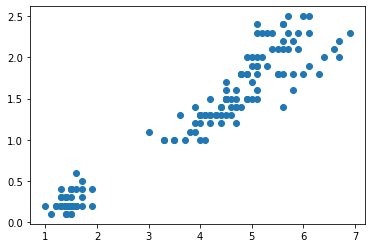

In [59]:
# X 의 분포를 표현하기

plt.scatter(X[:,0],X[:,1])

Text(0, 0.5, 'petal width')

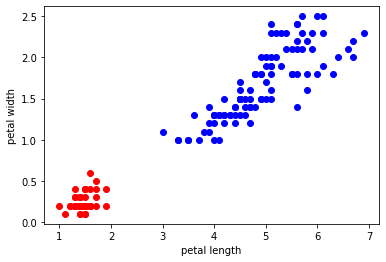

In [60]:
# target 값에 따른 X 의 분포를 표현하기

plt.scatter(X[:,0][y==0],X[:,1][y==0],c="blue")
plt.scatter(X[:,0][y==1],X[:,1][y==1],c="red")
plt.xlabel("petal length")
plt.ylabel("petal width")
#plt.plot()  ->  주피터 노트북 환경에서는 생략이 되어서 바로 출력이 가능하다. 

In [62]:
#모형 지정하기

per_clf = Perceptron()

In [63]:
#모형 학습하기

per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## 2. 학습 결과 확인하기

In [64]:
# 학습된 가중치와 편향값 확인하기 

print(per_clf.coef_)
per_clf.intercept_

[[-0.7 -1.2]]


array([2.])

Text(0, 0.5, 'petal width')

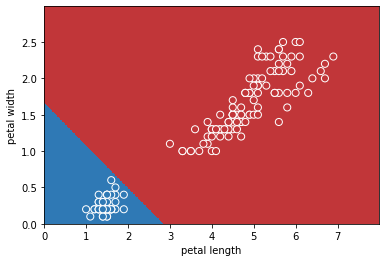

In [65]:
# 학습 결과를 그림으로 표현하기 

xx, yy = np.meshgrid(np.arange(0, 8, 0.01), np.arange(0, 3.0, 0.01))

# 이 구간에서 
Z = per_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)

# 바운더리 출력
plt.pcolormesh(xx, yy, Z, cmap = "RdBu", vmin = -.2, vmax = 1.2)

# 데이터 점 출력
plt.scatter(X[:,0], X[:, 1], c=y, s=50, 
            cmap = "RdBu", vmin = -.2, vmax = 1.2,
            edgecolor="white", linewidth=1)

# 축 설명 (꽃 잎)
plt.xlabel("petal length")
plt.ylabel("petal width")



Text(0.5, 1.0, 'Decision boundary: $2-0.7x_1-1.2x_2=0$')

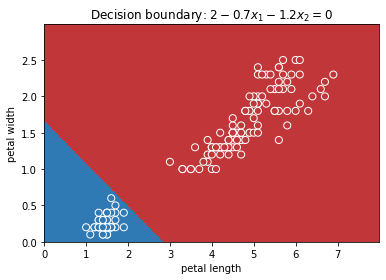

In [66]:
# 위 그림을 그대로 재현하되, 결정 경계식 (decision boundary) 의 수식을 추가하기 


# 학습 결과를 그림으로 표현하기 

xx, yy = np.meshgrid(np.arange(0, 8, 0.01), np.arange(0, 3.0, 0.01))

# 이 구간에서 
Z = per_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)

# 바운더리 출력
plt.pcolormesh(xx, yy, Z, cmap = "RdBu", vmin = -.2, vmax = 1.2)

# 데이터 점 출력
plt.scatter(X[:,0], X[:, 1], c=y, s=50, 
            cmap = "RdBu", vmin = -.2, vmax = 1.2,
            edgecolor="white", linewidth=1)

# 축 설명 (꽃 잎)
plt.xlabel("petal length")
plt.ylabel("petal width")

plt.title("Decision boundary: $2-0.7x_1-1.2x_2=0$")



In [68]:
# training error 출력하기 

sum(per_clf.predict(X) != y)

0

In [79]:
# petal length =2 cm, petal with=0.5 cm 일때의 iris 종류 예측하기


# per_clf.predict([[2,0.5]])

per_clf.predict([[1,0.5]])

array([1])